# Basil Docking V0.1 - Docking Preparation
## Purpose

__Target Audience__<br>
Undergraduate chemistry/biochemistry students and, in general, people that have little to no knowledge of protein-ligand docking and would like to understand the general process of docking a ligand to a protein receptor.

__Brief Overview__<br>
Molecular docking is a computational method used to predict where molecules are able to bind to a protein receptor and what interactions exist between the molecule (from now on, refered to as "ligand") and the receptor. It is a popular technique utilized in drug discovery and design, as when creating new drugs and testing existing drugs aginst new receptors, it is useful to determine the likelihood of binding prior to screening as it can be used to eliminate molecules that are unlikely to bind to the receptor. This significantly reduces the potential cost and time needed to test the efficacy of a set of possible ligands. <br>

The general steps to perform molecular docking, assuming the ligand and receptor are ready to be docked, include the generation of potential ligand binding poses and the scoring of each generated pose (which predicts how strongly the ligand binds to the receptor, with a more negative score corresponding to a stronger bond). To dock a ligand to a protein, (insert text).<br>

This notebook series encompasses<br>
1. __the preparation needed prior to docking (protein and ligand sanitation, ensuring files are in readable formats, and finding possible binding pockets)__
2. the process of docking ligand/s to a protein receptor using two docking engines (VINA and SMINA) and visualizing/analyzing the outputs
3. further data collection and manipulation
4. utilizing machine learning to determine key residues (on the protein) and functional groups (on the ligand) responsible for protein-ligand binding

__Stepwise summary for this notebook (docking preparation, notebook 1 out of (number))__<br>
- Get PDB file from the protein data bank and separate the protein and ligand into different files
- Import additional ligands (if desired)
- Prepare and separate ligands into their own MOL2 and PDBQT files
- Find possible binding pockets in protein
- View protein and ligand/s

The methods utilized by this notebook are based off of Angel J. Ruiz-Moreno's Jupyter-Dock notebooks, which can be found on their GitHub account AngelRuizMoreno

Ruiz-Moreno A.J. Jupyter Dock: Molecular Docking integrated in Jupyter Notebooks. https://doi.org/10.5281/zenodo.5514956

## Table of Libraries Used
### Operations, variable creation, and variable manipulation

| Module (Submodule/s)| Abbreviation| Role | Citation |
| :--- | :--- | :--- | :--- |
| numpy | np | performs mathematical operations, fixes NaN values in dataframe outputs, and gets docking box values from MDAnalysis | Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 10.1038/s41586-020-2649-2. (Publisher link). |
| pandas | pd | Organizes data in an easy-to-read format and allows for the exporting of data as a .csv file |  add source |
| numbers | n/a | performs mathematical operations |  add source |
| re |n/a| regular expression; finds and pulls specific strings of characters depending on need, allows for easy naming and variable creation | add source |
| os | n/a| allows for interaction with computer operating system, including the reading and writing of files |  add source |
| sys |n/a| manipulates python runtime environment |  add source |

### Protein and Ligand Preparation
| Module (Submodule/s)| Abbreviation | Role | Citation |
| :--- | :--- | :--- | :--- |
| biopython (Bio.PDB, PDBList)| n/a | fetches and downloads pdb strucures from rcsb.org |  add source |
| MDAnalysis | mda | allows for the selection of atoms for separating protein from ligands and ligands from each other | R. J. Gowers, M. Linke, J. Barnoud, T. J. E. Reddy, M. N. Melo, S. L. Seyler, D. L. Dotson, J. Domanski, S. Buchoux, I. M. Kenney, and O. Beckstein. MDAnalysis: A Python package for the rapid analysis of molecular dynamics simulations. In S. Benthall and S. Rostrup, editors, Proceedings of the 15th Python in Science Conference, pages 98-105, Austin, TX, 2016. SciPy, doi:10.25080/majora-629e541a-00e. |
| --- | --- | --- | N. Michaud-Agrawal, E. J. Denning, T. B. Woolf, and O. Beckstein. MDAnalysis: A Toolkit for the Analysis of Molecular Dynamics Simulations. J. Comput. Chem. 32 (2011), 2319-2327, doi:10.1002/jcc.21787. PMCID:PMC3144279. |
|Autodock Tools (prepare_receptor)| n/a | prepares protein for docking | Morris, G. M., Huey, R., Lindstrom, W., Sanner, M. F., Belew, R. K., Goodsell, D. S., & Olson, A. J. (2009). AutoDock4 and AutoDockTools4: Automated docking with selective receptor flexibility. Journal of computational chemistry, 30(16), 2785–2791. https://doi.org/10.1002/jcc.21256. |
| open babel (pybel)| n/a | prepares ligands for docking and allows for the conversion of ligand information to different file types |  O'Boyle, N.M., Banck, M., James, C.A. et al. Open Babel: An open chemical toolbox. J Cheminform 3, 33 (2011). https://doi.org/10.1186/1758-2946-3-33.|
| rdkit (Chem)| n/a | ligand sanitation |  RDKit: Open-source cheminformatics; http://www.rdkit.org |
| fpocket | n/a | finds possible binding pockets in protein receptors | Le Guilloux, V., Schmidtke, P. & Tuffery, P. Fpocket: An open source platform for ligand pocket detection. BMC Bioinformatics 10, 168 (2009). https://doi.org/10.1186/1471-2105-10-168. |

### Visualization
| Module (Submodule/s)| Abbreviation | Role | Citation |
| :--- | :--- | :--- | :--- |
| rdkit.Chem (Draw)| n/a | ligand visualization |  RDKit: Open-source cheminformatics; http://www.rdkit.org |
| py3Dmol | n/a | apoprotein and protein complex visualization |  Keshavan Seshadri, Peng Liu, and David Ryan Koes. Journal of Chemical Education 2020 97 (10), 3872-3876. https://doi.org/10.1021/acs.jchemed.0c00579. |

### UI
| Module (Submodule/s)| Abbreviation | Role | Citation |
| :--- | :--- | :--- | :--- |
| IPython (ipywidgets, display)| n/a | allows for widgets to be implemented and displayed | Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: https://ipython.org |
| ipywidgets (FileUpload)| widgets | allows for mol2 ligand files to be uploaded from a PC | Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: https://ipython.org |

In [21]:
import numpy as np
import pandas as pd
import numbers
import re
import sys, os
import glob
import ipywidgets as widgets
from ipywidgets import FileUpload
from IPython.display import display

from Bio.PDB import PDBList
import pdb2pqr
import MDAnalysis as mda 
from MDAnalysis.coordinates import PDB
from openbabel import pybel
from rdkit import Chem
from rdkit.Chem import Draw

import py3Dmol

import warnings
warnings.filterwarnings("ignore")

## Retrieve desired protein and ligand/s

The desired protein receptor (and ligand/s, if the PDB entry is a complex) can be retrieved from the Protein Data Bank using the biopython module; specifically, the Bio.PDB package. The retrieved PDB structure file is then cleaned (refering to the removal of water molecules and ions that may interfere with docking) before it is separated into two files using MDAnalysis atom selection: a PDB file containing the protein receptor, and a MOL2 file containing the ligand/s bound to the protein receptor (if present).

In [22]:
current_dir = os.getcwd()
print(current_dir)
dataPath = os.path.join(current_dir, "data")
print(dataPath)

pdb_list = PDBList()

# get PDB from pdb.org
name = input("Type 4-character PDB ID to be used\n")
pdb_id = str(name)
pdb_filename = pdb_list.retrieve_pdb_file(pdb_id, pdir="data/PDB_files", file_format="pdb")

# remove water molecules from PDB file
clean_file = "data/PDB_files/" + str(pdb_id) + "_clean.pdb"
with open(clean_file, 'w+') as datafile:
    with open(pdb_filename,"r") as outfile:
        data = outfile.readlines()
    for line in data:
        if 'HOH' not in line:
            if 'HETATM' in line:
                split_line = line.split()
                if split_line[0] != 'HETATM':
                    datafile.write(line)
                elif (split_line[0] == 'HETATM') & (split_line[2] != split_line[3]):
                    datafile.write(line)
            else:
                datafile.write(line)

# isolate protein
u = mda.Universe(f"data/PDB_files/{pdb_id}_clean.pdb")
protein = u.select_atoms("protein")
protein.write(f"data/PDB_files/{pdb_id}_protein.pdb")

# isolate ligands
ligand = u.select_atoms("not protein")
ligand.write(f"data/PDB_files/{pdb_id}_ligand.pdb")

# convert ligand pdb file to mol2 file
pdb_mol2 = [m for m in pybel.readfile(filename = f"data/PDB_files/{pdb_id}_ligand.pdb", format='pdb')][0]
out_mol2 = pybel.Outputfile(filename = f"data/MOL2_files/{pdb_id}_ligand.mol2", overwrite = True, format='mol2')
out_mol2.write(pdb_mol2)

/Users/leesch/Desktop/BASIL
/Users/leesch/Desktop/BASIL/data
Type 4-character PDB ID to be used
3NS1
Structure exists: 'data/PDB_files/pdb3ns1.ent' 


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/PDB_files/3NS1_ligand.pdb)



## Separating ligands into separate .mol2 files (if possible)

__1. Separating ligands from input pdb file into separate mol2 files (if needed)__ <br>
In this notebook, we will make sure that each ligand has its own mol2/pdbqt files. While this isn't a required step for for docking, separating the ligands into separate files makes data collection and analysis easier to perform and understand.

__2. Importing local mol2 files from a personal computer__ <br>
__3. Getting ligand/s mol2 files using SMILES strings__ <br>
In addition to ligand separation, this notebook also contains two methods of retrieving additional ligands to be used in ligand docking other than those present in the original protein complex. This allows for the testing of non-canonical binding agents using ligands that are of interest to the user.

### Method 1 : Obtaining ligands from input PDB file

To create multiple output files from one input file, the original file must be read thoroughly to ensure all data is captured and the resulting files must be carefully pieced together to ensure that the mol2 format is followed perfectly, as any descrepencies in the output files can drastically impact docking results. The function `separate_mol2_ligs` first parses through the input file, obtaining the line numbers for the different attributes (molecule, atom, bond, and substructure) and determining which information belongs to each ligand based on the name associated with it. From this, the following attributes are obtained:
- the line number where molecule information begins in the file
- the line number where atom information begins in the file
- the line number where bond information begins in the file
- the line number where structure information begins in the file
- ligand names in order of appearance in the file
- the location of the first instance of an atom corresponding to a given ligand
- the number of atoms in a given ligand
- the lines of the mol2 file that contain atom information acros all ligands
- the total number of atoms across all ligands
- the location of the first instance of a bond corresponding to a given ligand
- the number of bonds in a given ligand
- the lines of the mol2 file that contain bond information across all ligands
- the total number of bonds across all ligands
- the location of the first instance of a structure corresponding to a given ligand
- structure data for a given ligand

Using all of this information, new mol2 files are created for each ligand, with the final number of mol2 files outputted equalling the number of ligands present in the input file.

For more information on the mol2 file format, [this pdf has a lot of useful information](https://www.structbio.vanderbilt.edu/archives/amber-archive/2007/att-1568/01-mol2_2pg_113.pdf)

In [46]:
ligs = [] # name of ligands
filenames = [] # resulting file names for each ligand

def separate_mol2_ligs(filename = ''):
    ligand_file = os.path.join(current_dir, filename)
    tripos_mol = []
    tripos_atom = []
    tripos_bond = []
    tripos_struct = []
    with open(ligand_file, "r") as outfile:
        data = outfile.readlines()
        for linenum, line in enumerate(data):
            if "@<TRIPOS>MOLECULE" in line:
                tripos_mol.append(linenum)
            if "@<TRIPOS>ATOM" in line:
                tripos_atom.append(linenum)
            if '@<TRIPOS>BOND' in line:
                tripos_bond.append(linenum)
            if '@<TRIPOS>SUBSTRUCTURE' in line:
                tripos_struct.append(linenum)

    # variable initialization
    lig1 = '' # ligand name
    ligs_temp = []
    lig_loc = [] # location of first instance of an atom corresp. to a ligand in mol2 file
    atoms = [] # number of atoms for each ligand
    lines_atoms = [] # lines of atoms
    all_atoms = 0 # number of total atoms
    lig_bond_loc = [] # location of first instance of a bond corresp. to a ligand in mol2 file
    bonds = [] # number of bonds for each ligand
    lines_bonds = [] # lines of bonds
    all_bonds = 0 # number of total bonds
    lig_struct_loc = [] # location of first instance of a structure corresp. to a ligand in mol2 file
    structs = [] # structure data for each ligand
    
    # find lines containing atoms for each ligand
    with open(ligand_file, "r+") as outfile:
        data = outfile.readlines()
        a = 1
        # for each instance of the header in the mol2 file
        for instance, value in enumerate(tripos_atom):
            # for each line number in each instance
            for linenum, line in enumerate(data):
                # for each line where the line number is less than the line number for the next 
                # instance of bond data
                for i in range(linenum > value):
                    if linenum < tripos_bond[instance]:
                        ligand = line
                        lig_atom = ligand.split()
                        lig1 = str(lig_atom[-2])
                        # if a ligand is not in the list of identified ligands and is not labeled as 
                        # "UNL1", record the line number
                        if (lig1 not in ligs_temp) & (lig1 != 'UNL1'):
                            ligs_temp.append(str(lig1))
                            lig_loc.append(int(linenum))
                            a = 1
                        # if the number corresponding to the order of atoms is equal to one, it means
                        # these atoms belong to a new ligand, record the line number
                        elif int(lig_atom[0]) == 1:
                            lig_loc.append(int(linenum))
                            find_lig = data[tripos_mol[instance] + 1]
                            find_lig_2 = find_lig.split()
                            ligs_temp.append(find_lig_2[0])
                            a = 1
                        # if a ligand is in the list of identified ligands and is a different ligand 
                        # than the one in the line above it, the new ligand is a duplicate of a previously
                        # identified ligand, record the line number
                        if (lig1 in ligs_temp) & (lig1 != ligs_temp[-1]):
                            lig_loc.append(int(linenum))
                        newline = line.split()
                        newline[0] = str(a)
                        newline[-3] = str(1)
                        newline_2 = ' '.join(str(x) for x in newline)
                        lines_atoms.append(newline_2)
                    a += 1
            lig_loc.append(int(tripos_bond[instance]))
                
    lig_loc = [int(x) for x in lig_loc]
    lig_loc.sort()
    d = 0
    while d < len(lig_loc) - 1:
        if len(tripos_atom) == 1:
            atoms_1 = lig_loc[d + 1] - lig_loc[d]
            atoms.append(int(atoms_1))
            d += 1
        else:
            atoms_1 = lig_loc[d + 1] - lig_loc[d]
            atoms.append(int(atoms_1))
            d += 2
    all_atoms = sum(atoms)
    
    #Find lines containing bonds for a each ligand
    with open(ligand_file, "r+") as outfile:
        total_number = 0
        data = outfile.readlines()
        sum_atoms = 0
        a = 0
        b = 1
        # for each instance of the header in the mol2 file
        for instance, value in enumerate(tripos_bond):
            # for each line number in each instance
            for linenum, line in enumerate(data):
                # iterate only for line numbers greater than the line number for the instance
                for i in range(linenum > value):
                    total_number = linenum
                    # if there is a header for substructure information
                    if len(tripos_struct) > 0:
                        # for each line where the line number is less than the line number for the next 
                        # instance of substructure data
                        if linenum < tripos_struct[instance]:
                            bond = line
                            bond_num = bond.split()
                            bond_atom1 = int(bond_num[-2])
                            bond_atom2 = int(bond_num[-3])
                            # if the number corresponding to the order of the atom is greater than the
                            # sum of atoms for all ligands up to this point, the atom in this bond belongs to 
                            # a new ligand
                            if min(bond_atom1, bond_atom2) > sum_atoms:
                                lig_bond_loc.append(int(linenum))
                                sum_atoms += atoms[a]
                                a += 1
                                b = 1
                            # if the number corresponding to the order of the atom is one, the atom in 
                            # this bond belongs to a new ligand
                            elif int(bond_num[0]) == 1:
                                lig_bond_loc.append(int(linenum))
                                sum_atoms += atoms[a]
                                a += 1
                                b = 1
                            newline = line.split()
                            newline[0] = str(b)
                            newline[-2] = int(bond_num[-2]) - sum_atoms + int(atoms[a - 1])
                            newline[-3] = int(bond_num[-3]) - sum_atoms + int(atoms[a - 1])
                            newline_2 = ' '.join(str(x) for x in newline)
                            lines_bonds.append(newline_2)
                    # if there is no header for substructure information
                    else:
                        # if there is more than one molecule header and the current instance is not the last one
                        if tripos_mol[instance] != tripos_mol[-1]:
                            # if the line number is less than the line number for the next instance of 
                            # the molecule header
                            if linenum < tripos_mol[instance + 1]:
                                bond = line
                                bond_num = bond.split()
                                bond_atom1 = int(bond_num[-2])
                                bond_atom2 = int(bond_num[-3])
                                # if the number corresponding to the order of the atom is greater than the
                                # sum of atoms for all ligands up to this point, the atom in this bond belongs to 
                                # a new ligand
                                if min(bond_atom1, bond_atom2) > sum_atoms:
                                    lig_bond_loc.append(linenum)
                                    sum_atoms += atoms[a]
                                    a += 1
                                    b = 1
                                # if the number corresponding to the order of the atom is one, the atom in 
                                # this bond belongs to a new ligand
                                elif int(bond_num[0]) == 1:
                                    lig_bond_loc.append(int(linenum))
                                    sum_atoms += atoms[a]
                                    a += 1
                                    b = 1
                                newline = line.split()
                                newline[0] = str(b)
                                newline[-2] = int(bond_num[-2]) - sum_atoms + int(atoms[a - 1])
                                newline[-3] = int(bond_num[-3]) - sum_atoms + int(atoms[a - 1])
                                newline_2 = ' '.join(str(x) for x in newline)
                                lines_bonds.append(newline_2)
                        # if this is the last instance of a molecule header
                        else:
                            bond = line
                            bond_num = bond.split()
                            bond_atom1 = int(bond_num[-2])
                            bond_atom2 = int(bond_num[-3])
                            # if the number corresponding to the order of the atom is greater than the
                            # sum of atoms for all ligands up to this point, the atom in this bond belongs to 
                            # a new ligand
                            if min(bond_atom1, bond_atom2) > sum_atoms:
                                lig_bond_loc.append(int(linenum))
                                sum_atoms += atoms[a]
                                a += 1
                                b = 1
                            # if the number corresponding to the order of the atom is one, the atom in 
                            # this bond belongs to a new ligand
                            elif int(bond_num[0]) == 1:
                               lig_bond_loc.append(linenum)
                               sum_atoms += atoms[a]
                               a += 1
                               b = 1
                            newline = line.split()
                            newline[0] = str(b)
                            newline[-2] = int(bond_num[-2]) - sum_atoms + int(atoms[a - 1])
                            newline[-3] = int(bond_num[-3]) - sum_atoms + int(atoms[a - 1])
                            newline_2 = ' '.join(str(x) for x in newline)
                            lines_bonds.append(newline_2)
                    b += 1
            if len(tripos_struct) > 0:
                lig_bond_loc.append(tripos_struct[instance])
            elif tripos_mol[instance] != tripos_mol[-1]:
                lig_bond_loc.append(tripos_mol[instance + 1])
            else:
                lig_bond_loc.append(total_number + 1)
                
    lig_bond_loc = [int(x) for x in lig_bond_loc]
    lig_bond_loc.sort()
    
    e = 0
    while e < len(lig_bond_loc) - 1:
        if len(tripos_bond) == 1:
            atoms_1 = lig_bond_loc[e + 1] - lig_bond_loc[e]
            bonds.append(int(atoms_1))
            e += 1
        else:
            atoms_1 = lig_bond_loc[e + 1] - lig_bond_loc[e]
            bonds.append(int(atoms_1))
            e += 2
    all_bonds = sum(bonds)
    
    #find all substructure lines
    with open(ligand_file, "r+") as outfile:
        data = outfile.readlines()
        for linenum, line in enumerate(data):
            for instance, value in enumerate(tripos_struct):
                for i in range(linenum > value):
                    newline = line.split()
                    newline[0] = str(1)
                    substruct = ' '.join(str(x) for x in newline)
                    structs.append(substruct)
    
    #write a mol2 file for each ligand using collected data
    l = 0
    k = 0
    # if data from each ligand that is the same category (atom, bond, etc) is interrupted 
    # (i.e. "ATOM INFO FOR LIG 1" -> "BOND INFO FOR LIG 1" -> "ATOM INFO FOR LIG 2" -> "BOND INFO FOR LIG 2" -> ...)
    if (lig_loc[-1] - lig_loc[0]) > sum(atoms):
        while l < len(ligs_temp):
            filename = "data/MOL2_files/" + str(ligs_temp[l]) + ".mol2"
            filenames.append(filename)
            infile = open(filename, "w")
            tripos_mol = ["@<TRIPOS>MOLECULE\n", str(ligs_temp[l]) + "\n", str(atoms[l]) + " " + str(bonds[l]) + " " + str(1) + "\n","****\n", "****\n"]
            tripos_atoms = ["@<TRIPOS>ATOM\n"]
            int1 = int(lig_loc[k]) - lig_loc[0]
            int2 = int(lig_loc[k+1]) - lig_loc[0]
            if k > 0:
                int1 = int(lig_loc[k]) - sum(lig_loc[:k])
                int2 = int(lig_loc[k+1]) - sum(lig_loc[:k])
            while int1 < int2:
                tripos_atoms.append(str(lines_atoms[int1]) + "\n")
                int1 += 1
            tripos_bonds = ["@<TRIPOS>BOND\n"]
            int3 = int(lig_bond_loc[k] - lig_bond_loc[0])
            int4 = int(lig_bond_loc[k + 1] - lig_bond_loc[0])
            if k > 0:
                int3 = int(lig_bond_loc[k]) - sum(lig_bond_loc[:k])
                int4 = int(lig_bond_loc[k+1]) - sum(lig_bond_loc[:k])
            while int3 < int4:
                tripos_bonds.append(str(lines_bonds[int3]) + "\n")
                int3 += 1
            if len(tripos_struct) > 0:
                tripos_substructures = ["@<TRIPOS>SUBSTRUCTURE\n", str(structs[l])]
            infile.writelines(tripos_mol)
            infile.writelines(tripos_atoms)
            infile.writelines(tripos_bonds)
            if len(tripos_struct) > 0:
                infile.writelines(tripos_substructures)
            infile.close()
            l += 1
            k += 2
    # if data from each ligand that is the same category (atom, bond, etc) is unbroken
    # (i.e. "ATOM INFO FOR LIG 1" -> "ATOM INFO FOR LIG 2" -> "BOND INFO FOR LIG 1" -> "BOND INFO FOR LIG 2" -> ...)
    else:
        while l < len(ligs_temp):
            filename = "data/MOL2_files/" + str(ligs_temp[l]) + ".mol2"
            filenames.append(filename)
            infile = open(filename, "w") # out of index error for next line
            tripos_mol = ["@<TRIPOS>MOLECULE\n", str(ligs_temp[l]) + "\n", str(atoms[l]) + " " + str(bonds[l]) + " " + str(1) + "\n","****\n", "****\n"]
            tripos_atoms = ["@<TRIPOS>ATOM\n"]
            int1 = int(lig_loc[l]) - lig_loc[0]
            int2 = int(lig_loc[l+1]) - lig_loc[0]
            while int1 < int2:
                tripos_atoms.append(str(lines_atoms[int1]) + "\n")
                int1 += 1
            tripos_bonds = ["@<TRIPOS>BOND\n"]
            int3 = int(lig_bond_loc[l] - lig_bond_loc[0])
            int4 = int(lig_bond_loc[l + 1] - lig_bond_loc[0])
            while int3 < int4:
                tripos_bonds.append(str(lines_bonds[int3]) + "\n")
                int3 += 1
            if len(tripos_struct) > 0:
                tripos_substructures = ["@<TRIPOS>SUBSTRUCTURE\n", str(structs[l])]
            infile.writelines(tripos_mol)
            infile.writelines(tripos_atoms)
            infile.writelines(tripos_bonds)
            if len(tripos_struct) > 0:
                infile.writelines(tripos_substructures)
            infile.close()
            ligs.append(ligs_temp[l])
            l += 1
    return ligs

In [47]:
# create separate mol2 files for ligand/s in input pdb file
file = "data/MOL2_files/" + str(pdb_id) + "_ligand.mol2"
separate_mol2_ligs(filename = file)

['FES601', 'FES602', 'FAD606', 'MTE1326', 'MOS1327', 'PM61']

<div class="alert alert-block alert-info">
<b>Please note:</b> Some ligands covalently bind to residues of the receptor, and thus are not good candidates for molecular docking. Iron-sulfur clusters, for example, are cofactors that typically bind to sulfur atoms on CYS residues via thiol exchange or a similar mechanism. This means that trying to dock them into potential binding pockets is not necessarily the best method of determining where they will bind. </div>

Duplicates of a ligand in a protein complex's pdb file can result in innacurate calculations of ligand locations, sizes, and centers in future cells. To prevent this, the chain ID of the first occurence of each ligand present in the input pdb file is recorded, and will be used to accurately and precisely select the atoms present in the ligand.

In [51]:
# determine which chain each ligand is in
lig_chain = []
with open(f"data/PDB_files/{pdb_id}_ligand.pdb", "r") as outfile:
    temp_ligs = []
    data = outfile.readlines()
    for linenum, line in enumerate(data):
        ligand = line.split()
        if "HETATM" in ligand[0]:
            lig1 = ligand[3] + ligand[5]
            if "." in lig1:
                temp_num = re.findall(r'\d+', ligand[4])
                temp2_num = ''.join(str(x) for x in temp_num)
                lig1 = ligand[3] + temp2_num
            if lig1 not in temp_ligs:
                temp_ligs.append(lig1)
                chain_id = ligand[4][0]
                lig_chain.append(chain_id[0])
print(lig_chain)

['A', 'A', 'B', 'C', 'C', 'C']


### Method 2:  Adding ligands from local .mol2 files

To dock a ligand that is not present in the imported PDB file, we can upload its mol2 file (which can be obtained on the pdb website) and obtain all the relavent information using ipywidgets. The upload widget will only accept mol2 files; any other file type will result in an error. Multiple files are able to be uploaded at once. To use the uploader, the cell below needs to be run. As a result of running the cell, the upload button will appear, allowing mol2 files to be selected. After uploading the files, the next cell will be ready to be run and will write each uploaded mol2 file into the "Data" folder.

In [2]:
lig_files = []
upload = widgets.FileUpload(accept='.mol2', multiple=True)
display(upload)

FileUpload(value={}, accept='.mol2', description='Upload', multiple=True)

In [46]:
# get information for each uploaded mol2 file
for file_num, upload_filename in enumerate(upload.value):
    uploaded_file = upload.value[upload_filename]
    uploaded_file_name = uploaded_file['metadata']['name']
    lig_files.append(uploaded_file_name)

# write mol2 files into data folder for each ligand 
for name in lig_files:
    with open("data/MOL2_files/" + str(name), "wb") as fp:
        fp.write(upload.value[name]["content"])
    filenames.append(name)
    name_alone = name.split('.')[0]
    ligs.append(name_alone)

### Method 3: Adding ligands using user-input SMILE format

If you are familiar with SMILES format, you can input the SMILES string for the ligand/s in the cell below. Invalid SMILES strings will result in an error. This method is not recommended for those with no experience with SMILES formatting, as a small mistake in the SMILES string can result in the creation of an invalid molecule and can cause issues in the docking process.

In [ ]:
# rewrite to use widgets?
smiles = []
smile_names = []
ligs_int = 0
num_of_ligs = input('Type in the number of ligands you would like to input in the form of an integer \n')
booleanInt = num_of_ligs.isnumeric()
while booleanInt == False:
    num_of_ligs = input('Invalid response. Type in the number of ligands you would like to input in the form of an integer\n')
    booleanInt = num_of_ligs.isnumeric()

ligs_int = int(num_of_ligs)
a = 0
while a < ligs_int:
    lig_name = input("Type in a name to identify your ligand with no spaces (Example: 2-Propanol)\n")
    lig_scratch = input("Type in the ligand using SMILE codes (Example : CC(O)C\n")
    lig_test = Chem.MolFromSmiles(lig_scratch)
    if len(lig_scratch) < 2000 & lig_test is not None:
        smile_names.append(lig_name)
        smiles.append(lig_scratch)
    a += 1

out=pybel.Outputfile(filename='data/MOL2_files/InputMols.mol2',format='mol2',overwrite=True)
for index, smi in enumerate(smiles):
    mol = pybel.readstring(string=smi,format='smiles')
    mol.title= str(smile_names[index])
    mol.make3D('mmff94s')
    mol.localopt(forcefield = 'mmff94s', steps = 500)
    out.write(mol)
out.close()
separate_mol2_ligs(filename = 'data/MOL2_files/InputMols.mol2')

## Cleaning and Preparing Ligands for Docking

Before docking, both the protein receptor and ligand/s need to be sanitized to ensure the shape of the ligand and receptor molecules are valid and to reduce the possibility of biologically irrelevant/unlikely/impossible poses. Sanitizing includes adding the hydrogens that are missing in the PDB/MOL2 files, making sure the charges of the protein are correct, and converting both PDB (protein receptor) and MOL2 (ligand/s) files to PDBQT format (which is necessary for docking using the VINA engine), which stores the hydrogen and charge information for each molecule.

In [11]:
# protein sanitization
# add hydrogens to protein receptor
input_file = "data/PDB_files/" + str(pdb_id) + "_protein.pdb"
pqr_file = "data/PDB_files/" + str(pdb_id) + "_protein.pqr"
output_file = "data/PDB_files/" + str(pdb_id) + "_protein_H.pdb"
! pdb2pqr --pdb-output {output_file} --pH 7.4 --whitespace {input_file} {pqr_file}

INFO:PDB2PQR v3.6.1: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: data/PDB_files/3NS1_protein.pdb
ERROR:Error parsing line: invalid literal for int() with base 10: ''
ERROR:<REMARK     2>
ERROR:Truncating remaining errors for record type:REMARK

ERROR:['REMARK']
INFO:Setting up molecule.
INFO:Created biomolecule object with 2438 residues and 18872 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:Attempting to repair 6 missing atoms in biomolecule.
INFO:Added atom OXT to residue LYS A 165 at 

In [19]:
# protein sanitization
# create pdbqt file for receptor
to_pdbqt = mda.Universe(pqr_file)
to_pdbqt.atoms.write(f"data/PDBQT_files/{pdb_id}_protein.pdbqt")

# remove "TITLE" and "CRYST1" labels with "REMARK" to reduce chance of errors later on
with open(f"data/PDBQT_files/{pdb_id}_protein.pdbqt", 'r') as file:
    file_content = file.read()
file_content = file_content.replace('TITLE', 'REMARK').replace('CRYST1', 'REMARK')
with open(f"data/PDBQT_files/{pdb_id}_protein.pdbqt", 'w') as file:
    file.write(file_content)

In [48]:
# ligand sanitization
# add hydrogens to ligands
filenames_H = []
a = 0
for i in filenames:
    mol= [m for m in pybel.readfile(filename= str(i),format='mol2')][0]
    mol.addh()
    s = "data/MOL2_files/" + str(ligs[a]) + "_H.mol2"
    filenames_H.append(s)
    out = pybel.Outputfile(filename= "data/MOL2_files/" + str(ligs[a]) + "_H.mol2",format='mol2',overwrite=True)
    out.write(mol)
    out.close()
    a += 1

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is FAD606)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is PM61)



In [52]:
# ligand sanitization
# convert to pdbqt
n = 0
filenames_pdbqt = []
for i in filenames:
    # explain openbabel code
    ligand = [m for m in pybel.readfile(filename= str(i) ,format='mol2')][0]
    s = "data/PDBQT_files/" + str(ligs[n]) + "_H.pdbqt"
    filenames_pdbqt.append(s)
    ligand.write(filename = s, format='pdbqt', overwrite=True)
    n += 1

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is FAD606)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is PM61)



For docking, information about the size and center of the ligand/s is needed to ensure that the entire ligand can be docked to the desired binding pocket. To add a little bit of "wiggle room", the lengths of the x, y, and z dimensions are increased by 5 angstroms (if the length is positive, five is added; if the length is negative, five is subtracted).

In [118]:
# get center and size of ligand/s
lig_box_c = []
lig_box_s = []
for h, i in enumerate(filenames_H):
    # MAKE SURE THAT RESNAMES ARE ALWAYS FIRST 3 LETTERS
    res_name_joined = ligs[h][0:3]
    res_id_joined = ligs[h][3:]
    if h < len(lig_chain):
        res_chain = lig_chain[h]
        ligand_mda = u.select_atoms("resname " + str(res_name_joined) + " and resnum " + str(res_id_joined) +" and chainID " + str(res_chain))
    else:
        #need to create new universe. "u" as universe will not work as ligand will not be in pdb file
        u2 = mda.Universe(i)
        ligand_mda = u2.select_atoms()
    pocket_center = ligand_mda.center_of_geometry()
    pocket_center_list = np.ndarray.tolist(pocket_center)
    ligand_box = ligand_mda.positions.max(axis=0) - ligand_mda.positions.min(axis=0)
    ligand_box_list = np.ndarray.tolist(ligand_box)
    ligand_box_list2 = []
    for value in ligand_box_list:
        if value < 0:
            ligand_box_list2.append(float(value - 5))
        elif value > 0:
            ligand_box_list2.append(float(value + 5))
        else:
            ligand_box_list2.append(float(0))
    lig_box_c.append(pocket_center_list)
    lig_box_s.append(ligand_box_list2)
print(lig_box_c)
print(lig_box_s)

[[38.55074977874756, -2.8942500054836273, 18.570250034332275], [35.33699989318848, -9.215749979019165, 30.553500175476074], [23.80584900334196, -17.542565975549085, 38.34060363049777], [39.86529127756754, 8.513250013192495, 15.320291678110758], [37.827250480651855, 13.727250099182129, 18.575250148773193], [38.06279945373535, 20.425800132751466, 18.394500160217284]]
[[6.785999298095703, 7.568999767303467, 7.695001602172852], [7.559001922607422, 7.63800048828125, 6.28700065612793], [15.2760009765625, 19.666998863220215, 21.63599967956543], [12.020000457763672, 14.92199993133545, 12.130999565124512], [7.778999328613281, 6.9589996337890625, 6.808000564575195], [7.237998962402344, 9.545999526977539, 8.722999572753906]]


## Find possible binding pockets in protein using fpocket

fpocket is an algorithm that aids in protein pocket detection and scoring. Based on variables including solvent accessibility, the hydrophobicity of residues, density, flexibility, residue charges, and more (all contributing variables are listed in the table below), the likelihood of a pocket acting as a binding site to a nonspecified ligand is calculated (also known as the druggability score), which helps determine possible docking boxes to be used in ligand docking.

Column descriptions for data output (pocket_descriptors.csv):

| Descriptor | Role |
| --- | --- |
| drug_score | score ranging from 0 to 1 describing the likelihood of a drug binding to a given pocket, where 0.5 is the threshold where the binding of a drug in the pocket is possible |
| volume | pocket volume|
|nb_asph| the number of alpha spheres in a pocket, which measures the size of cavity normalized to the largest pocket|
|inter_chain | an integer equal to 0 (if the pocket is made of a single chain) or 1 (if the pocket is comprised of 2 chains)|
|apol_asph_proportion | proportion of apolar alpha spheres; the percentage of alpha spheres in a pocket that are apolar|
|mean_asph_radius| mean alpha sphere radius|
|as_density| alpha sphere density of pocket, calculated by taking the mean of all alpha sphere pair-to-pair distances. smaller values indicate a more compact and dense pocket|
|mean_asph_solv_acc| mean alpha sphere solvent accessibility|
|mean_loc_hyd_dens| mean local hydrophobic density; identification of areas of the binding pocket with localized hydrophobicity. calculated by seeing how many apolar spheres overlap with each other. the sum of all apolar neighbors is divided by the total number of apolar spheres|
|flex| flexibility of pocket (b factor)|
|hydrophobicity_score| the hydrophobicity score, which is the mean hydrophobicity score of all residues in the pocket|
|volume_score| the volume score, which is the mean volume score of all amino acids in contact with at least one alpha sphere of the pocket|
|charge_score| the charge score, which is the mean charge for all amino acids in contact with at least one alpha sphere of the pocket|
|polarity_score| the polarity score, which is the hydrophilicity of the binding pocket, which is calculated by taking the mean of all polarity scores of all residues in the pocket|
|a0_apol | describes apolar van der Walls surface of pocket|
|a0_pol | describes polar van der Walls surface of pocket|
|af_apol | describes apolar van der Walls surface of pocket|
|af_pol | describes polar van der Walls surface of pocket|
|n_abpa| the number of abpas in the binding site |
|three-letter amino acid code (i.e. "ala")|Absolute amino acid composition of a given pocket, divided into groups by amino acid|
|chain_1_type| chain 1 type; an integer equal to 0 (if the pocket is a protein pocket), 1 (if the pocket is a nucleic acid pocket), or 2 (if the pocket is a HETATM pocket)|
|chain_2_type| chain 2 type; an integer equal to 0 (if the pocket is a protein pocket), 1 (if the pocket is a nucleic acid pocket), or 2 (if the pocket is a HETATM pocket)|
|num_res_chain_1|  the total number of residues in chain 1|
|num_res_chain_2| number of residues on chain 2. if the pocket is only made up of one chain, the value of this descriptor is equal to the value of "num_res_chain_1"|
|lig_het_tag|  HETATM tag of ligands situated in the binding pocket|
|name_chain_1|  the name of the first chain in contact with the pocket (denoted using a letter [i.e. "A"])|
|name_chain_2|  the name of the second chain in contact with the pocket (denoted using a letter [i.e. "A"]). if the pocket is only made up of one chain, the value of this descriptor is equal to the value of "name_chain_1"|

In [11]:
#use fpocket to view potential pockets in protein
! fpocket -f {"data/PDB_files/" + str(pdb_id) + "_clean.pdb"} -d > {"data/pocket_descriptors.csv"}

In [61]:
prot_pockets = pd.read_csv('data/pocket_descriptors.csv',sep=' ',index_col=[0])

In [62]:
#get pockets and docking boxes for all pockets in a dataframe
fpocket_out = "data/PDB_files/" + str(pdb_id)+ "_clean_out/"
f_pocket_dir = os.path.join(current_dir, fpocket_out)
for file in os.listdir(f_pocket_dir):
    if 'env_atm' in file:
        atoms = []
        res_and_atoms = []
        pocket_num = int(file.split('_')[0].replace('pocket',''))
        out_dir = os.path.join(f_pocket_dir, file)
        with open(out_dir, 'r') as outfile:
            data = outfile.readlines()
        for line in data:
            split_line = line.split()
            if len(split_line) > 1:
                select_atom_num = split_line[1]
                select_atom = split_line[2]
                select_residue = split_line[3]
                select_residue_num = split_line[5]
                # if the residue number for a protein has four digits (greater than 999), split_line[5] will be 
                # equal to the x coordinate of the atom as the whitespace between the chain identifier and the 
                # residue number will disappear. the following if statement addresses this
                if "." in select_residue_num: 
                    temp_residue_num = re.findall(r'\d+', split_line[4])
                    temp2_residue_num = ''.join(str(x) for x in temp_residue_num)
                    select_residue_num = int(temp2_residue_num)
                atoms.append(select_atom_num)
                md_input1 = "(resid " + str(select_residue_num) + " and name " + str(select_atom) + ")"
                res_and_atoms.append(md_input1)

        # get center of docking box
        atom_string = ', '.join(str(x) for x in atoms)
        res_and_atom_string = ' or '.join(str(x) for x in res_and_atoms)
        md_input2 = "id " + str(atom_string)
        pocket_mda = u.select_atoms(res_and_atom_string)
        pocket_center = pocket_mda.center_of_geometry()
        pocket_center_list = np.ndarray.tolist(pocket_center)

        # get size of docking box
        ligand_box = pocket_mda.positions.max(axis=0) - ligand_mda.positions.min(axis=0)
        ligand_box_list = np.ndarray.tolist(ligand_box)
        ligand_box_list2 = []
        for value in ligand_box_list:
            if value < 0:
                ligand_box_list2.append(float(value - 5))
            elif value > 0:
                ligand_box_list2.append(float(value + 5))
            else:
                ligand_box_list2.append(float(0))
        
        prot_pockets.loc[pocket_num,'center_x'] = pocket_center_list[0]
        prot_pockets.loc[pocket_num,'center_y'] = pocket_center_list[1]
        prot_pockets.loc[pocket_num,'center_z'] = pocket_center_list[2]
        prot_pockets.loc[pocket_num,'size_x'] = abs(ligand_box_list2[0])
        prot_pockets.loc[pocket_num,'size_y'] = abs(ligand_box_list2[1])
        prot_pockets.loc[pocket_num,'size_z'] = abs(ligand_box_list2[2])
        
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(prot_pockets)

drug_score     volume  nb_asph  inter_chain  apol_asph_proportion  \
cav_id                                                                      
1           0.9951   866.9764      178            1                0.4101   
2           0.9949   896.1404      182            1                0.4121   
3           0.9962  2075.7842      248            1                0.4919   
4           0.0621   874.5828      103            0                0.2621   
5           0.2201   439.8324       79            1                0.3165   
6           0.0021   142.7058       25            0                0.2400   
7           0.0105   257.2677       45            1                0.2222   
8           0.0013    94.9655       21            1                0.4286   
9           0.1544   407.1897       69            1                0.3188   
10          0.0007    83.2199       16            1                0.3125   
11          0.0153   156.1856       30            1                0.5667   
12          0.1506   529.7383       79            0                0.3291   
13          0.0103   262.4700       46            1                0.2391   
14          0.0017   112.8163       17            0                0.4706   
15          0.0030   301.1912       15            0                0.6667   
16          0.0027   250.2581       18            0                0.7778   
17          0.0005   886.1180       47            0                0.2766   
18          0.0108   359.6427       24            0                0.6250   
19          0.0051   248.6628       15            1                0.6000   
20          0.0019   267.0679       15            0                0.6000   
21          0.0005   207.3333       18            0                0.2222   
22          0.0552   502.7208       73            0                0.3288   
23          0.0049   145.3582       27            1                0.5185   
24          0.0016   132.3327       21            0                0.2381   
25          0.0060   234.2915       17            1                0.5882   
26          0.0003   119.4686       15            1                0.0000   
27          0.0003   214.0617       16            0                0.2500   
28          0.0006   220.1930       19            1                0.3158   
29          0.0004   196.0455       15            0                0.2000   
30          0.6721   633.8271       81            1                0.5679   
31          0.0003   332.2072       35            0                0.0571   
32          0.0003   348.0835       31            0                0.1290   
33          0.0112   453.5344       62            0                0.2097   
34          0.0006   307.9334       22            0                0.0455   
35          0.0006   310.6956       21            0                0.4286   
36          0.0027   244.0239       22            0                0.8182   
37          0.0190  1001.9930      123            0                0.2683   
38          0.0016   214.4012       15            0                0.6000   
39          0.0010   337.5018       31            0                0.2903   
40          0.0005   332.8510       19            0                0.2632   
41          0.0100   390.9185       35            1                0.6000   
42          0.0005   232.7260       20            0                0.0500   
43          0.0001    63.6564       15            0                0.0000   
44          0.0003    96.8902       22            1                0.1818   
45          0.0005   230.0229       30            0                0.1333   
46          0.0058   306.2143       16            0                0.8750   
47          0.0003   256.6681       21            1                0.0952   
48          0.0002    86.6844       17            1                0.0000   
49          0.0043   435.7092       18            0                0.6111   
50          0.0006   235.6509       34            0                0.1765   
51  

To make docking more efficient, all pockets with a drugability score greater than 0.20 will be added to a new dataframe, which will be used to create the docking boxes for ligands. If the number of posible binding pockets found by fpocket exceeds 25, it is highly recommended that the cell below is run.

In [63]:
prot_pockets2 = prot_pockets[prot_pockets['drug_score'] >= 0.20]
prot_pockets2

drug_score     volume  nb_asph  inter_chain  apol_asph_proportion  \
cav_id                                                                      
1           0.9951   866.9764      178            1                0.4101   
2           0.9949   896.1404      182            1                0.4121   
3           0.9962  2075.7842      248            1                0.4919   
5           0.2201   439.8324       79            1                0.3165   
30          0.6721   633.8271       81            1                0.5679   
55          0.3101   616.1018       78            1                0.4872   
102         0.8723  1027.6793      104            1                0.7019   
106         0.3990  1906.5021      245            1                0.3347   
131         0.6712   646.0149       69            1                0.6957   
152         0.5232  2671.1025      318            1                0.3679   
154         0.3861  2446.2969      259            1                0.3938   

        mean_asph_radius  as_density  mean_asph_solv_acc  mean_loc_hyd_dens  \
cav_id                                                                        
1                 3.8993      7.9030              0.4787            42.6849   
2                 3.8953      7.9307              0.4843            41.9467   
3                 3.8206     14.2601              0.4002            33.8197   
5                 3.6612      5.1696              0.4171            20.6400   
30                3.9267      5.3337              0.4617            37.6957   
55                3.9444      5.2716              0.4634            32.6842   
102               3.9831      7.7608              0.4583            41.8356   
106               3.9371     10.6219              0.4357            28.7073   
131               3.9481      5.5267              0.4177            40.7917   
152               3.8677     12.2041              0.4356            35.4530   
154               4.0329     10.9447              0.4391            37.6275   

          flex  ...  num_res_chain_2  lig_het_tag  name_chain_1  name_chain_2  \
cav_id          ...                                                             
1       0.0468  ...              600          MTE             L             J   
2       0.0418  ...              600          MTE             C             A   
3       0.1437  ...             -570          NaN             J             C   
5       0.0977  ...             -570          NaN             C             L   
30      0.0908  ...             -570          NaN             C             L   
55      0.0893  ...             -570          NaN             C             L   
102     0.1532  ...             -570          NaN             L             C   
106     0.4016  ...              600          NaN             L             J   
131     0.1173  ...             -570          NaN             C             L   
152     0.3708  ...              382          NaN             C             B   
154     0.4254  ...              382          NaN             J             K   

         center_x   center_y   center_z     size_x     size_y     size_z  
cav_id                                                                    
1       63.976762  13.198192  20.157954  64.612003  24.095001  27.481998  
2       63.956269  13.097794  20.262441  65.617001  24.095001  27.481998  
3       61.486473   1.216097  32.490949  45.058002  15.376001  40.418999  
5       63.192697   9.471691  24.048676  39.285999  18.195000  26.701000  
30      63.334851  10.012250  23.469577  48.369999  25.784000  29.237000  
55      63.321151   9.944151  23.539494  47.507999  25.688000  29.237000  
102     64.068919  13.869102  19.473054  67.533001  29.104002  22.237000  
106     60.064979  -5.807530  39.726199  75.098999  10.610001  50.528999  
131     64.105176  13.995697  19.368063  64.037998  28.867001  19.655998  
152     60.434037  -4.065393  37.899460  79.949005  14.579000  50.528999  
154     57.658298 -17.11

In [64]:
prot_pockets2.to_csv("data/protein_pockets.csv")

## View ligands and proteins together prior to docking

While viewing the ligand/s and receptor is not required, being able to see what the molecules look like as well as being able to see the possible binding pockes on the receptor does help (continue). There are a few different methods this notebook will use to visualize the ligands/proteins to be used in docking. <br>
The first method this notebook will be using is rdkit's Draw module, which takes rdkit molecules and displays a static image of them. This method is easy to implement and only takes one line of code (assuming an rdkit Molecule already exists).<br> 
The second method that will be used is py3Dmol, which requires more code to implement but allows for the user to move and rotate the molecule/s and allows for larger molecules (including proteins) to be viewed.

[14:56:21] FES601: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[14:56:21] FES602: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.


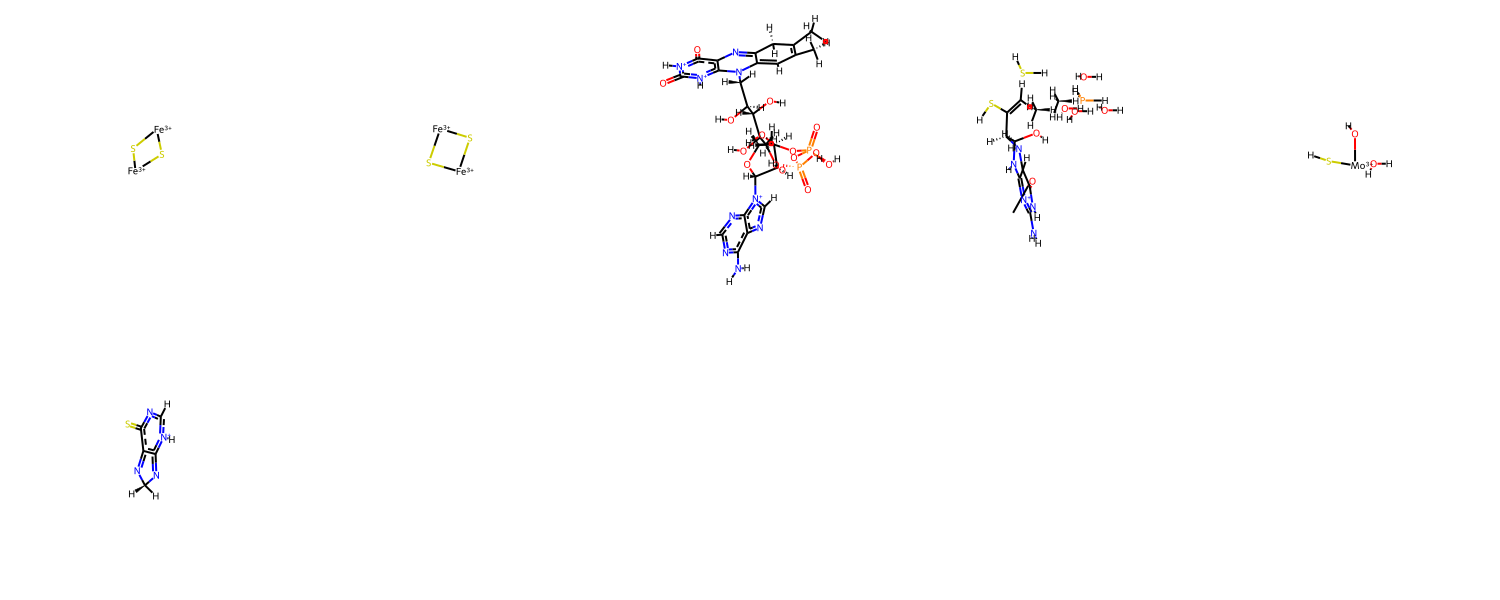

In [65]:
#View ligands
mols = []
for i in ligs:
    mol = Chem.MolFromMol2File("data/MOL2_files/" + str(i) + "_H.mol2",sanitize=False)
    mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(300,300))

Below is code to create the py3Dmol viewer, which consists of three different views. They are as follows:
1. a viewer containing the ligand/s and the receptor, in which the space filling model (surface) of the receptor is present
2. a viewer containing the ligand/s and the receptor, with the addition of transparent boxes around each ligand demonstrating the size and center of the ligand docking boxes. The colors of the ligand boxes differ for clarity's sake, but are otherwise meaningless
3. a viewer containing the ligand/s and the receptor, with the addition of the binding pockets found by fpocket. The colors of the binding pockets differ for clarity's sake, but are otherwise meaningless

To avoid parsing through every binding pocket file only to visualize a portion of them, a list containing all of the pqr file paths for binding pockets with a druggability score greater than 0.20 will be created. The pqr file format includes charge and radius field information for each atom in a binding pocket in addition to information recorded in pdb files.

In [77]:
revised_files = []
pocketPath = os.path.join(current_dir, "data", "PDB_files", str(pdb_id) + "_clean_out", "*.pqr")
pocketFiles = glob.glob(pocketPath)
for file in pocketFiles:
    split_1 = file.split("/")[-1]
    split_2 = split_1.split("_")[0]
    index_num = re.findall(r'\d+', split_2)
    index_num2 = ''.join(str(x) for x in index_num)
    if int(index_num2) in prot_pockets2.index:
        revised_files.append(file)

<div class="alert alert-block alert-info">
<b>Please note:</b> 
When viewing a larger protein receptor, a py3Dmol viewer may not be able to support three views at once. For proteins that are greater than 100 kDa in size, it is recommended to use two different py3Dmol viewers that depict one view each.
</div>

The cell below creates a py3Dmol viewer that has all three views described above in a grid that are linked, where moving one view moves the other two views to the same position in space. __Only use for proteins that are less than 100 kDa in size.__

In [113]:
# View Protein and ligand/s together
# Only use for smaller proteins
view = py3Dmol.view(height = 800, width = 900, viewergrid = (1,3), linked = True)
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})

for i in filenames_H:
    viewer_count = 0
    while viewer_count < 3:
        # add receptor (protein) model to all py3Dmol viewers
        view.addModel(open('data/PDB_files/' + str(pdb_id) + '_protein.pdb','r').read(),format='pdb')
        Prot=view.getModel(viewer = (0,viewer_count))
        Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}}, viewer=(0,viewer_count))
 
        # add ligand/s to all py3Dmol viewers
        view.addModel(open(i,'r').read(),format='mol2')
        ref_m = view.getModel(viewer = (0, viewer_count))
        ref_m.setStyle({},{'stick':{'colorscheme':'greenCarbon','radius':0.2}})
        viewer_count += 1

view.addSurface(py3Dmol.VDW,{'opacity':0.6,'color':'white'}, viewer=(0,0))

#visualization for docking boxes for each ligand (viewer 2)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'magenta']
for num, i in enumerate(filenames_H):
    view.addBox({"center" :dict(x = lig_box_c[num][0], y = lig_box_c[num][1], z = lig_box_c[num][2]), "dimensions": dict(d = abs(lig_box_s[num][0]), h = abs(lig_box_s[num][1]), w = abs(lig_box_s[num][2])), "color" : colors[num], "opacity" : 0.5}, viewer = (0,1))

#visualization for binding pockets found by fpocket (viewer 3)
a = 0
for file in revised_files:
    view.addModel(open(file,'r').read(),format = 'pqr', viewer = (0,2))
    pockets = view.getModel(viewer = (0,2))
    pockets.setStyle({},{'sphere':{'color':colors[a],'opacity':0.5}}) 
    a += 1
    if a > 6:
        a = 0

view.zoomTo()
view.show()

KeyboardInterrupt: 

The cells below creates a py3Dmol viewer that 1) visualizes ligands and their docking boxes with the receptor and 2) visualizes the size and location of potential binding pockets along with the ligands and receptor. These can be used for proteins that are of any size, but is necessary for proteins greater than 100 kDa in size.

In [119]:
view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})

# add receptor (protein) model to py3Dmol viewer
view.addModel(open('data/PDB_files/' + str(pdb_id) + '_protein.pdb','r').read(),format='pdb')
Prot=view.getModel()
Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}})

#visualization for ligands and docking boxes for each ligand
for i in filenames_H:
    view.addModel(open(i,'r').read(),format='mol2')
    ref_m = view.getModel()
    ref_m.setStyle({},{'stick':{'colorscheme':'greenCarbon','radius':0.2}})
    
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'magenta']
a = 0
for j, i in enumerate(filenames_H):
    view.addBox({"center": dict(x = lig_box_c[j][0], y = lig_box_c[j][1], z= lig_box_c[j][2]), "dimensions": dict(d = abs(lig_box_s[j][0]), h = abs(lig_box_s[j][1]), w = abs(lig_box_s[j][2])), "color" : colors[a], "opacity" : 0.5})
    a += 1
    if a > 6:
        a = 0

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [81]:
view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})

# add receptor (protein) model to py3Dmol viewer
view.addModel(open('data/PDB_files/' + str(pdb_id) + '_protein.pdb','r').read(),format='pdb')
Prot=view.getModel()
Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}})

#visualization ligands
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'magenta']
for h, i in enumerate(filenames_H):
    # add ligand/s to all py3Dmol viewers
    view.addModel(open(i,'r').read(),format='mol2')
    ref_m = view.getModel()
    ref_m.setStyle({},{'stick':{'colorscheme':'greenCarbon','radius':0.2}})

a = 0
for file in revised_files:
    view.addModel(open(file,'r').read(),format = 'pqr')
    pockets = view.getModel()
    pockets.setStyle({},{'sphere':{'color':colors[a],'opacity':0.5}}) 
    a += 1
    if a > 6:
        a = 0

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Save results for further use

To use the data collected in this notebook for the next notebook in this series (Docking and Preliminary Analysis), a .csv file containing ligand filenames and ligand box sizes and centers will be created, allowing for the variables to be easily imported and used.

In [120]:
center_x = []
center_y = []
center_z = []
size_x = []
size_y = []
size_z = []
for h, i in enumerate(ligs):
    center_x.append(lig_box_c[h][0])
    center_y.append(lig_box_c[h][1])
    center_z.append(lig_box_c[h][2])
    size_x.append(lig_box_s[h][0])
    size_y.append(lig_box_s[h][1])
    size_z.append(lig_box_s[h][2])
ligand_information = pd.DataFrame({"ligs": ligs,
                                   "filenames": filenames,
                                   "filenames_H": filenames_H,
                                   "filenames_pdbqt": filenames_pdbqt,
                                   "center_x": center_x,
                                   "center_y": center_y,
                                   "center_z": center_z,
                                   "size_x": size_x,
                                   "size_y": size_y,
                                   "size_z": size_z
                                  })
ligand_information.to_csv('data/ligand_information.csv', index = False)